# Logistic regression

## Logistic regression model
$ h_\theta(x) = g(\theta^{\intercal}x) $

where: $ g(z) = \frac{1}{1+e^{-z}} $; $z = \theta^{\intercal}x $

$ h_\theta(x) = \frac{1}{1+e^{-\theta^{\intercal}x}} $

## Cost function (with regularization)
$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1 - h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$

## Gradient descent (with regularization)

repeat until convergence {

>$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $

}

$ \frac{\partial}{\partial \theta_0} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $ for j = 0 

$ \frac{\partial}{\partial \theta_j} J(\theta) = ( \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} ) + \frac{\lambda}{m} \theta_j $ for j >= 1

In [1]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

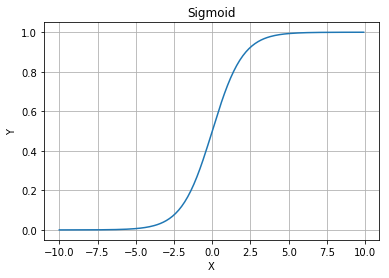

In [2]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-1 * x))

x = [0.1 * x for x in xrange(-100, 100)]
y = map(sigmoid, x)

plt.plot(x, y)

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sigmoid')
plt.show()

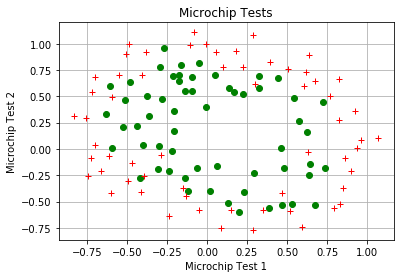

In [3]:
data = np.loadtxt('microchip_tests.csv', delimiter=',')

# Filter data based on last column value
passed = data[np.where(data[:,2] == 1)]
failed = data[np.where(data[:,2] == 0)]

plt.plot(passed[:, 0], passed[:, 1], 'go')
plt.plot(failed[:, 0], failed[:, 1], 'r+')

plt.grid(True)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Microchip Tests')
plt.show()

## Hypothesis

$ h_\theta(x) = g(\theta_0 * x_0 + \theta_1 * x_1 + \theta_2 * x_2 + \theta_3 * x_1^2*x_2+ ... + \theta_n * x_1^n*x_2^n) $

,where:

$ x_0 = 1 $ (used to make math easier)

$ x_1 $ - Microchip Test 1

$ x_2 $ - Microchip Test 2

$ n $ - Degree of features polynomial

$ g(z) = \frac{1}{1+e^{-z}} $ - Sigmoid function

In [4]:
def map_features(x, degree=6):
    """Map features to polynomial features."""
    features_count = sum(xrange(2, degree+2))
    ret = np.ones((x.shape[0], features_count))

    x1 = x[:, 0]
    x2 = x[:, 1]

    col = 0
    for i in xrange(1, degree+1):
        for j in xrange(0, i+1):
            temp = np.power(x1, i-j) * np.power(x2, j)
            ret[:, col] = temp
            col += 1
    
    return ret

In [5]:
def cost_function(theta, x, y, l=0):
    m = x.shape[0]
    h = sigmoid(theta.T.dot(x.T)).T
    h = np.asarray(h)

    y = y.reshape(h.shape)
    
    theta = theta.ravel()
    
    reg = ((1.0 * l) / (2 * m)) * np.sum(np.power(theta[1:], 2))
    J = (1.0 / m) * (((-1 * y.T).dot(np.log(h))) - ((1 - y.T).dot(np.log(1 - h))))
    J += reg
    
    grad = (1.0 / m) * ((h - y).T.dot(x))
    grad = grad.ravel()       
        
    grad_0 = grad[0]
    reg = (((1.0 * l) / m) * theta.ravel()).T
    grad += reg
    grad[0] = grad_0
    
    return (np.sum(J), grad)

In [6]:
# Prepare training and cross validation data
passed_size = passed.shape[0]
failed_size = failed.shape[0]

training_size = 0.75

passed_train = passed[0:int(training_size * passed_size)]
passed_cv = passed[int(training_size * passed_size):]

failed_train = failed[0:int(training_size * failed_size)]
failed_cv = failed[int(training_size * failed_size):]

assert np.array_equal(passed, np.concatenate((passed_train, passed_cv), axis=0))
assert np.array_equal(failed, np.concatenate((failed_train, failed_cv), axis=0))

In [7]:
# Training data
train = np.concatenate((passed_train, failed_train), axis=0)
train_x = np.array(train[:, :2])
train_x = map_features(train_x)

# Add extra column of 1's at the begining - for bias (theta_0)
temp_array = np.ones((train_x.shape[0], train_x.shape[1] + 1))
temp_array[:, 1:] = train_x
train_x = temp_array

train_y = train[:, 2]

# Cross validation data
cv = np.concatenate((passed_cv, failed_cv), axis=0)
cv_x = np.array(cv[:, :2])
cv_x = map_features(cv_x)

# Add extra column of 1's at the begining - for bias (theta_0)
temp_array = np.ones((cv_x.shape[0], cv_x.shape[1] + 1))
temp_array[:, 1:] = cv_x
cv_x = temp_array

cv_y = cv[:, 2]

In [8]:
# Initial cost
theta = np.random.rand(train_x.shape[1],1)
l = 0  # No regularization

J, grad = cost_function(theta, train_x, train_y, l)

J_arr = []
n = 0

alpha = 15
while J > 0.01 and n < 10000:
    J_arr.append(J)
    theta = (theta.T - alpha * grad).T
    
    J, grad = cost_function(theta, train_x, train_y, l)
    n += 1


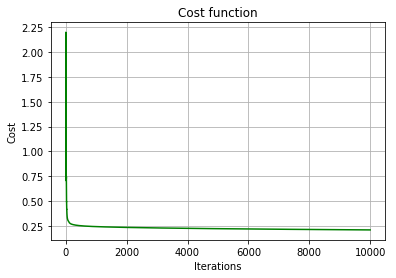

Final cost = 0.210700094978


In [9]:
plt.plot(xrange(len(J_arr)), J_arr, 'g')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function')
plt.show()

print('Final cost = {0}'.format(J_arr[-1]))

c:\python27\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


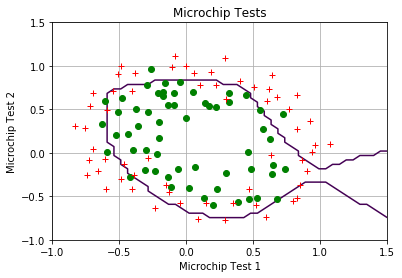

In [10]:
u = np.linspace(-1, 1.5, 50);
v = np.linspace(-1, 1.5, 50);
z = np.zeros((u.shape[0], v.shape[0]))

for i in xrange(z.shape[0]):
    for j in xrange(z.shape[1]):
        x = map_features(np.array([[u[i], v[j]]]))
        temp_array = np.ones((x.shape[0], x.shape[1] + 1))
        temp_array[:, 1:] = x
        x = temp_array        
        z[i, j] = round(sigmoid(theta.T.dot( x.T)))
     
plt.contour(u, v, z, levels=[0])

plt.plot(passed[:, 0], passed[:, 1], 'go')
plt.plot(failed[:, 0], failed[:, 1], 'r+')

plt.grid(True)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('Microchip Tests')
plt.show()

In [11]:
def predict(X):
    return map(round, sigmoid(theta.T.dot(X.T)).ravel())

pred_train = map(abs, predict(train_x) - train_y)
pred_cv = map(abs, predict(cv_x) - cv_y)

pred_train_rate = 1. - (1. * sum(pred_train)) / len(pred_train)
pred_cv_rate = 1. - (1. * sum(pred_cv)) / len(pred_cv)


print 'Training prediction rate: {0:.2}%'.format(pred_train_rate)
print 'CV prediction rate: {0:.2}%'.format(pred_cv_rate)

Training prediction rate: 0.91%
CV prediction rate: 0.73%
